In [6]:
import sys; sys.path.append("../../..")
import functools
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

from edge_detection import get_sobel_grad_2d
from gaussian import generate_gaussian_kernel
from helpers import plot_image, read_image

_plot = functools.partial(plot_image, cmap="gray", interpolation="bilinear")

## Read Image

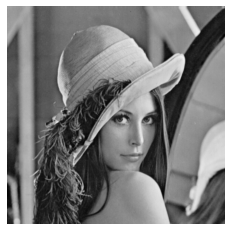

In [7]:
im = read_image("../../../images/lena512gray.bmp") / 255.
_plot(im, plt.gca())

## Solution 1 - Sobel

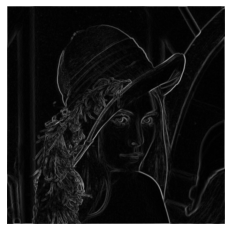

In [9]:
grad, _ = get_sobel_grad_2d(im)
_plot(grad, plt.gca())

## Solution 2 - Gaussian Smooth, then Sobel

In [63]:
gaussian_smooth = generate_gaussian_kernel(15, sigma=3.0)

### Smoothing

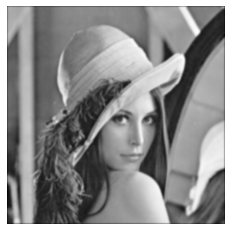

In [64]:
im_smooth = correlate2d(im, gaussian_smooth, mode="same")
_plot(im_smooth, plt.gca())

### Sobel

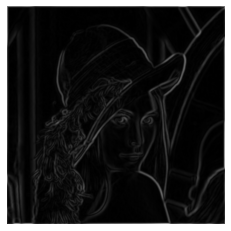

In [65]:
grad, _ = get_sobel_grad_2d(im_smooth)
_plot(grad, plt.gca())

## Solution 3 - Apply Sobel to Gaussian Smooth Kernel

In [66]:
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]], dtype=np.float32)
gaussian_smooth_sobel_x = correlate2d(gaussian_smooth, sobel_x, mode="same")
gaussian_smooth_sobel_y = correlate2d(gaussian_smooth, sobel_y, mode="same")

In [67]:
grad_x = correlate2d(im, gaussian_smooth_sobel_x, mode="same")
grad_y = correlate2d(im, gaussian_smooth_sobel_y, mode="same")
grad = np.sqrt(np.square(grad_x) + np.square(grad_y))  # skip the normalization 

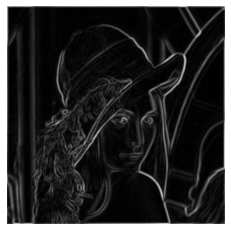

In [68]:
_plot(grad, plt.gca())

## Solution 4 - Apply 2nd order derivative to Gaussian Smooth Kernel (Laplacian)

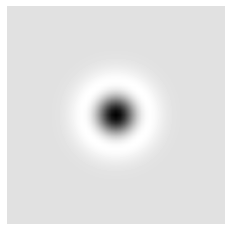

In [78]:
gaussian_smooth = generate_gaussian_kernel(51, sigma=15.0)
gaussian_smooth_sobel_x = correlate2d(gaussian_smooth, sobel_x, mode="same")
gaussian_smooth_sobel_y = correlate2d(gaussian_smooth, sobel_y, mode="same")
gaussian_2nd_derivative_x = correlate2d(gaussian_smooth_sobel_x, sobel_x, mode="same")
gaussian_2nd_derivative_y = correlate2d(gaussian_smooth_sobel_y, sobel_y, mode="same")
laplacian_of_gaussian = gaussian_2nd_derivative_x + gaussian_2nd_derivative_y
_plot(laplacian_of_gaussian, plt.gca())

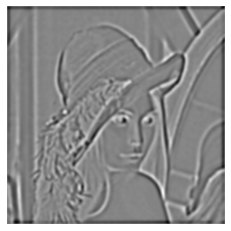

In [79]:
grad = correlate2d(im, laplacian_of_gaussian, mode="same")
_plot(grad, plt.gca())

### Zero-crossing Detection

-0.45299690718213265 0.46521828788911396


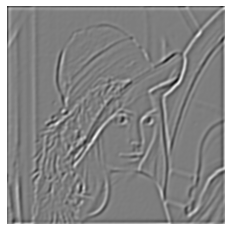

In [98]:
neg = grad <= 0
pos = grad >= 0
edge = neg[:-1, :-1] == pos[1:, 1:]
diff = grad[1:, 1:] - grad[:-1, :-1]
print(diff.min(), diff.max())
_plot(diff, plt.gca())

### Plot final results

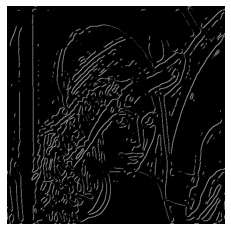

In [97]:
th = .03
_plot((((abs(diff) > th) & edge) * 255).astype(np.uint8), plt.gca())